In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from PIL import Image
import random
import os
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications import vgg16
from keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import pickle
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import math
import time

### VGG16을 이용한 이미지 임베딩 벡터 추출
##### 마지막 fc layer 이전의 layer를 가져와 우리의 이미지에 대한 벡터 생성

In [3]:
vgg_model = vgg16.VGG16(weights='imagenet')

553467096/553467096 [==============================] - 5s 0us/step


In [4]:
# 이미지 파일 경로
imgs_path = "/content/drive/MyDrive/캡스톤/데이터/포스터/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10

# 마지막 레이어를 제거하여 예측 대신 특징 벡터 추출
img_features = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.gif']
files = [imgs_path + x for x in os.listdir(imgs_path) if any(ext in x for ext in extensions)]
print("이미지 수:", len(files))

이미지 수: 127


In [5]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [6]:
# extract the images features

# 이미지 특징 추출
imgs_features = img_features.predict(processed_imgs)
print("features successfully extracted!")
imgs_features.shape

4/4 [==============================] - 94s 24s/step
features successfully extracted!


(127, 4096)

In [7]:
x = pd.DataFrame(imgs_features)
x

0         1        2         3         4     5         6     \
0    0.000000  0.000000  0.00000  0.861699  3.658608   0.0  0.000000   
1    0.000000  0.000000  0.00000  0.000000  1.518692   0.0  0.000000   
2    0.000000  0.800907  0.00000  0.000000  0.000000   0.0  0.000000   
3    0.000000  0.948940  0.00000  1.628235  2.121703   0.0  0.000000   
4    0.000000  0.000000  0.00000  0.000000  4.353264   0.0  0.000000   
..        ...       ...      ...       ...       ...   ...       ...   
122  0.000000  0.000000  0.00000  0.542124  3.543475   0.0  1.167105   
123  2.821583  0.000000  0.00000  0.000000  2.478270   0.0  0.750457   
124  0.087571  0.149728  0.00000  0.000000  4.167222   0.0  0.000000   
125  0.000000  0.155026  0.74349  0.969993  3.493989   0.0  1.170362   
126  0.000000  0.000000  0.00000  0.000000  0.000000   0.0  0.000000   

         7         8         9     ...      4086      4087      4088  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  2.600020   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  ...  0.302464  0.000000  0.863983   
4    6.293684  0.000000  6.491461  ...  0.000000  3.252698  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
122  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
123  0.623345  0.000000  0.000000  ...  0.000000  0.000000  1.940785   
124  0.000000  0.000000  0.904329  ...  0.000000  0.000000  1.622195   
125  0.000000  0.000000  0.372829  ...  0.000000  0.000000  0.397609   
126  4.188540  1.793944  1.949914  ...  0.000000  1.479709  1.991039   

         4089      4090      4091  4092      4093      4094      4095  
0    0.000000  0.000000  0.942020   0.0  1.956625  0.000000  0.000000  
1    2.201529  0.989478  0.000000   0.0  0.000000  0.000000  0.116392  
2    0.000000  2.229650  0.000000   0.0  0.000000  1.648511  0.868380  
3    0.000000  0.000000  0.000000   0.0  1.038198  0.000000  0.226773  
4    0.533122  0.000000  0.000000   0.0  1.528719  0.000000  1.573097  
..        ...       ...       ...   ...       ...       ...       ...  
122  0.000000  0.000000  0.000000   0.0  0.975603  0.000000  0.000000  
123  0.000000  2.541257  0.000000   0.0  0.000000  0.000000  4.186625  
124  0.000000  0.000000  0.000000   0.0  5.661771  0.159703  0.000000  
125  0.000000  0.000000  1.576965   0.0  1.119290  0.000000  0.000000  
126  0.218062  0.775159  0.000000   0.0  0.000000  0.000000  3.567054  

[127 rows x 4096 columns]

파일: /content/drive/MyDrive/캡스톤/데이터/포스터/라면에 파송송.png
--------------------------------------------------------------------
추천 작품명과 유사도:


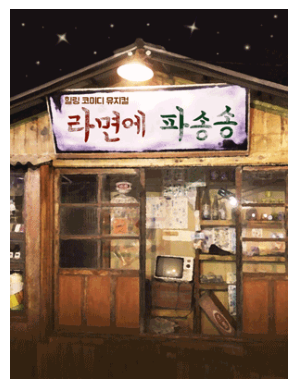

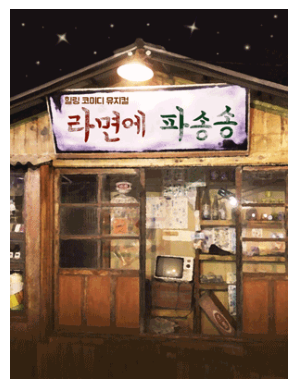

/content/drive/MyDrive/캡스톤/데이터/포스터/라면에 파송송.png - 유사도: 1.0000001192092896


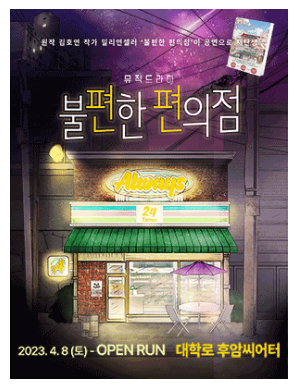

/content/drive/MyDrive/캡스톤/데이터/포스터/뮤직드라마 〈불편한 편의점〉.png - 유사도: 0.5501994490623474


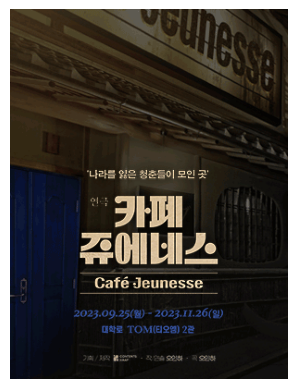

/content/drive/MyDrive/캡스톤/데이터/포스터/연극 〈카페 쥬에네스〉.gif - 유사도: 0.53981614112854


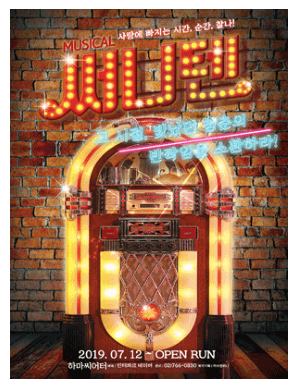

/content/drive/MyDrive/캡스톤/데이터/포스터/써니텐.gif - 유사도: 0.465645968914032


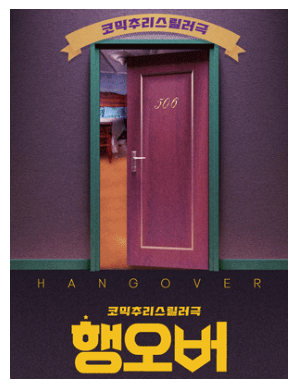

/content/drive/MyDrive/캡스톤/데이터/포스터/행오버.png - 유사도: 0.46327197551727295


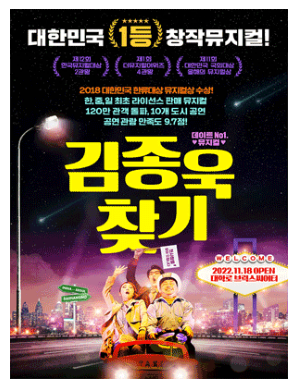

/content/drive/MyDrive/캡스톤/데이터/포스터/뮤지컬 〈김종욱 찾기〉.png - 유사도: 0.44593632221221924

파일: /content/drive/MyDrive/캡스톤/데이터/포스터/［연애하기 좋은 날  당근거래］ - 전주.gif
--------------------------------------------------------------------
추천 작품명과 유사도:


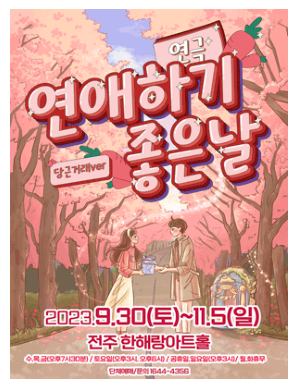

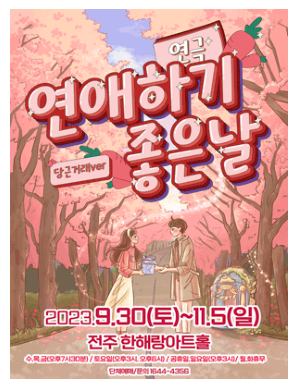

/content/drive/MyDrive/캡스톤/데이터/포스터/［연애하기 좋은 날  당근거래］ - 전주.gif - 유사도: 1.0


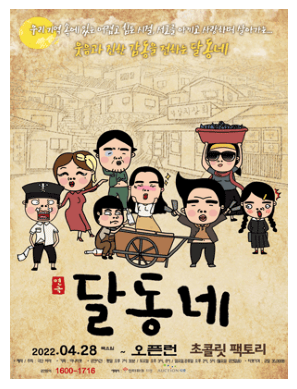

/content/drive/MyDrive/캡스톤/데이터/포스터/(코믹연극) 달동네-부산.gif - 유사도: 0.6498610973358154


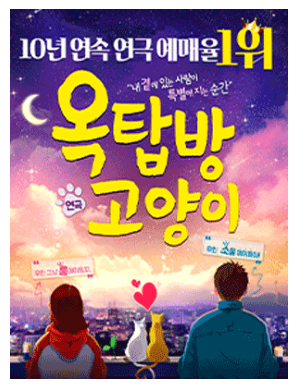

/content/drive/MyDrive/캡스톤/데이터/포스터/10년 연속 1위 연극〈옥탑방고양이〉- 틴틴홀.png - 유사도: 0.5973726511001587


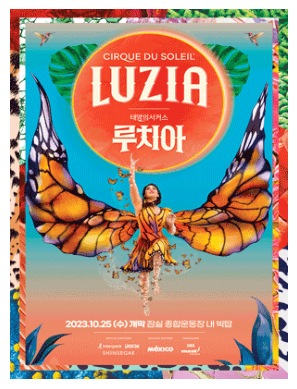

/content/drive/MyDrive/캡스톤/데이터/포스터/태양의서커스 〈루치아〉.png - 유사도: 0.5946080088615417


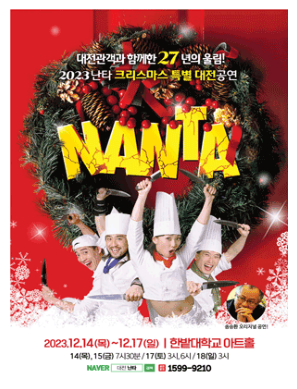

/content/drive/MyDrive/캡스톤/데이터/포스터/2023송승환의 오리지널 난타(대전).png - 유사도: 0.5843819975852966


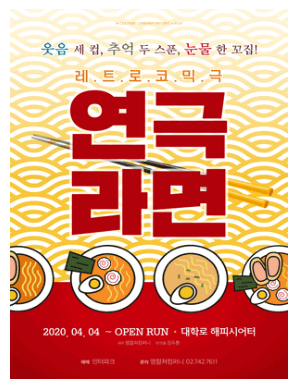

/content/drive/MyDrive/캡스톤/데이터/포스터/［서울 대학로］연극 라면.png - 유사도: 0.5808163285255432

파일: /content/drive/MyDrive/캡스톤/데이터/포스터/뮤지컬 〈컴프롬어웨이〉.png
--------------------------------------------------------------------
추천 작품명과 유사도:


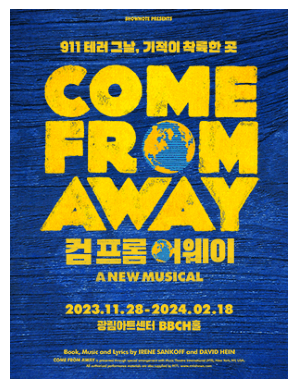

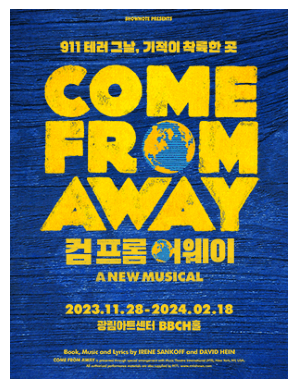

/content/drive/MyDrive/캡스톤/데이터/포스터/뮤지컬 〈컴프롬어웨이〉.png - 유사도: 1.0000001192092896


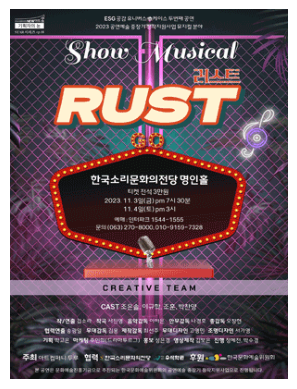

/content/drive/MyDrive/캡스톤/데이터/포스터/러스트(RUST) - 전주.gif - 유사도: 0.5500267744064331


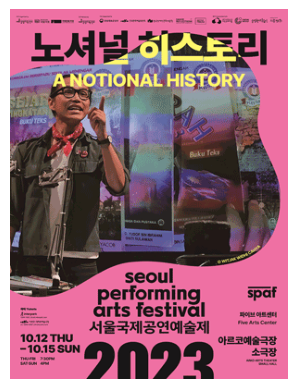

/content/drive/MyDrive/캡스톤/데이터/포스터/［2023 SPAF］ 파이브 아트 센터 〈노셔널 히스토리〉.gif - 유사도: 0.5260672569274902


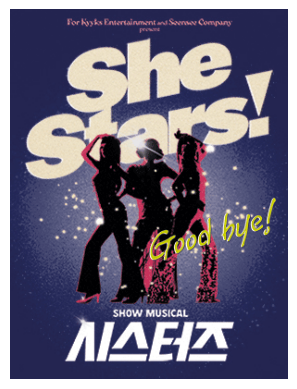

/content/drive/MyDrive/캡스톤/데이터/포스터/쇼 뮤지컬 〈시스터즈 (SheStars!)〉.png - 유사도: 0.5249166488647461


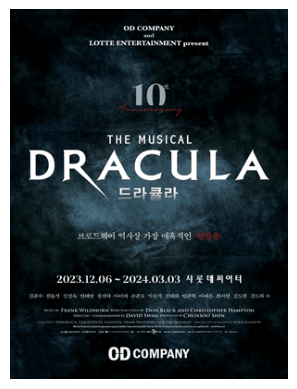

/content/drive/MyDrive/캡스톤/데이터/포스터/뮤지컬 드라큘라 (Dracula：The Musical).png - 유사도: 0.5069907903671265


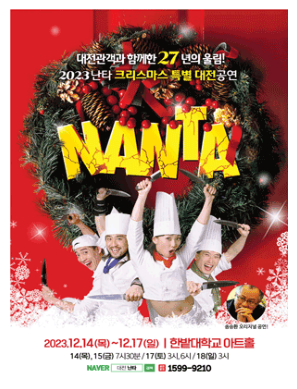

/content/drive/MyDrive/캡스톤/데이터/포스터/2023송승환의 오리지널 난타(대전).png - 유사도: 0.5066053867340088

파일: /content/drive/MyDrive/캡스톤/데이터/포스터/2023 매직쇼〈최현우의 미스틱커스〉 - 평택.gif
--------------------------------------------------------------------
추천 작품명과 유사도:


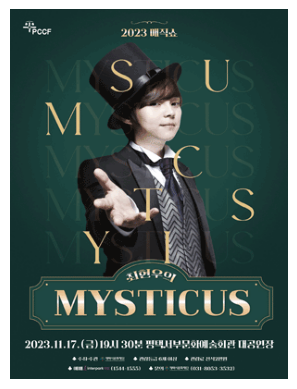

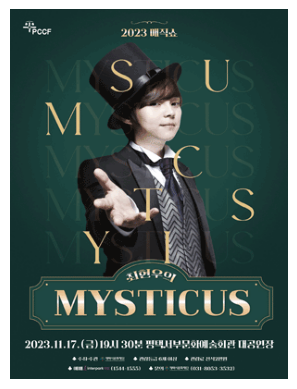

/content/drive/MyDrive/캡스톤/데이터/포스터/2023 매직쇼〈최현우의 미스틱커스〉 - 평택.gif - 유사도: 1.0000001192092896


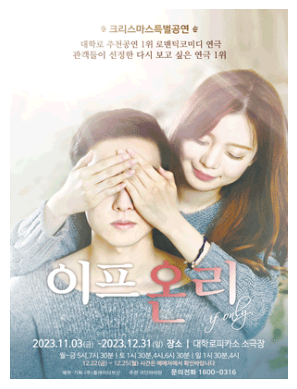

/content/drive/MyDrive/캡스톤/데이터/포스터/［2023_셀러브리티 명품 로코］연극 이프온리 크리스마스특별 공연 - 대학로.png - 유사도: 0.5695551633834839


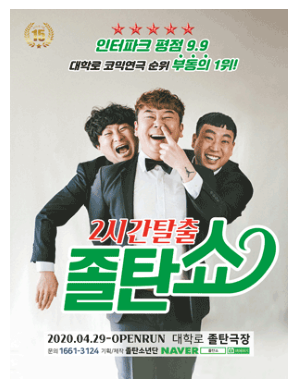

/content/drive/MyDrive/캡스톤/데이터/포스터/2시간탈출 졸탄쇼.png - 유사도: 0.5623303651809692


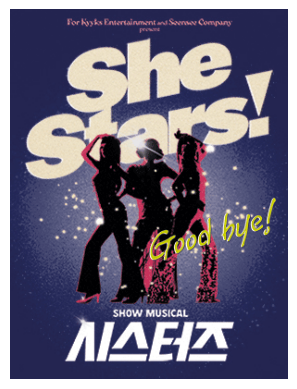

/content/drive/MyDrive/캡스톤/데이터/포스터/쇼 뮤지컬 〈시스터즈 (SheStars!)〉.png - 유사도: 0.530790388584137


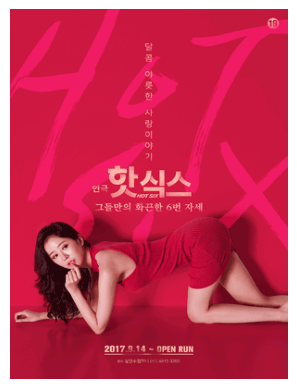

/content/drive/MyDrive/캡스톤/데이터/포스터/연극 핫식스.gif - 유사도: 0.5136088132858276


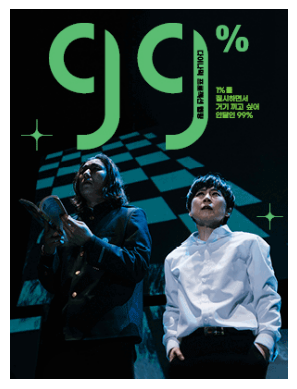

/content/drive/MyDrive/캡스톤/데이터/포스터/［연극 on stage］ 99% - 화성.gif - 유사도: 0.49543583393096924

파일: /content/drive/MyDrive/캡스톤/데이터/포스터/연극 〈극적인 하룻밤〉.gif
--------------------------------------------------------------------
추천 작품명과 유사도:


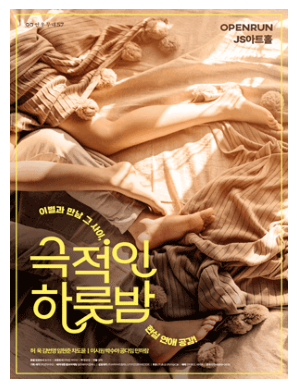

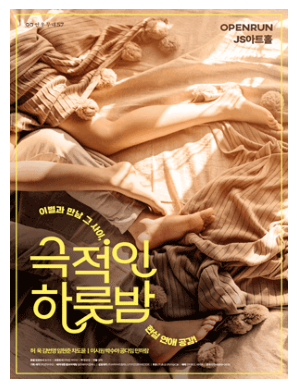

/content/drive/MyDrive/캡스톤/데이터/포스터/연극 〈극적인 하룻밤〉.gif - 유사도: 0.9999998807907104


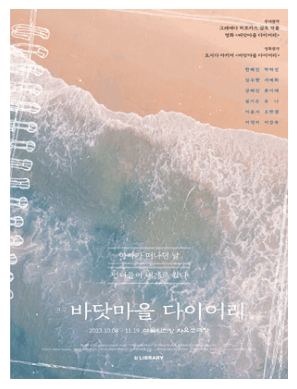

/content/drive/MyDrive/캡스톤/데이터/포스터/연극 〈바닷마을 다이어리〉.png - 유사도: 0.4951463043689728


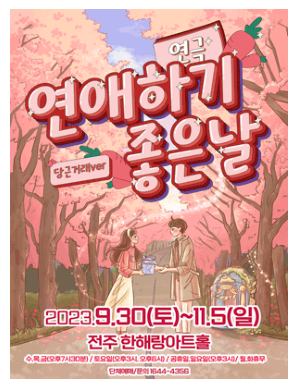

/content/drive/MyDrive/캡스톤/데이터/포스터/［연애하기 좋은 날  당근거래］ - 전주.gif - 유사도: 0.4761137366294861


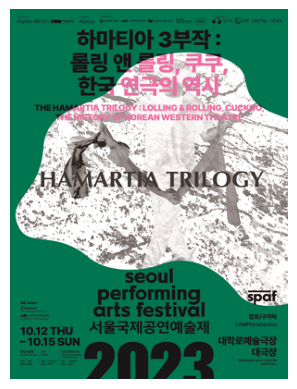

/content/drive/MyDrive/캡스톤/데이터/포스터/［2023 SPAF］ 구자하 캄포 〈하마티아 3부작: 롤링 앤 롤링〉.gif - 유사도: 0.45434582233428955


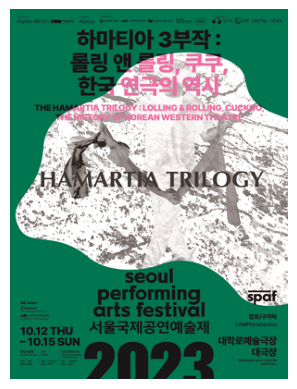

/content/drive/MyDrive/캡스톤/데이터/포스터/［2023 SPAF］ 구자하 캄포 〈하마티아 3부작: 한국 연극의 역사〉.gif - 유사도: 0.45434582233428955


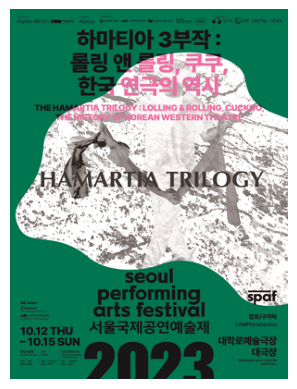

/content/drive/MyDrive/캡스톤/데이터/포스터/［2023 SPAF］ 구자하 캄포 〈하마티아 3부작: 쿠쿠〉.gif - 유사도: 0.45434582233428955



In [12]:
features_array = np.array(imgs_features)

# 각 작품간의 코사인 유사도 계산
similarities = cosine_similarity(features_array)

num_images = len(imgs_features)

# 랜덤으로 5개의 이미지만 유사도가 높은 5개의 이미지를 출력
random_files = random.sample(files, 5)

for file in random_files:
    file_index = files.index(file)

    file_similarities = similarities[file_index]

    top_10 = file_similarities.argsort()[::-1][:6]

    print(f"파일: {file}")
    print(f"--------------------------------------------------------------------")
    print("추천 작품명과 유사도:")

    img_path = file
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # 유사한 이미지 출력
    for idx in top_10:
        similar_file = files[idx]
        similarity = file_similarities[idx]
        similar_img_path = similar_file

        similar_img = Image.open(similar_img_path)
        plt.imshow(similar_img)
        plt.axis('off')
        plt.show()

        print(f"{similar_file} - 유사도: {similarity}")

    print()